## Kevin Zakes - MLB Attendance 2014

### Background:  I found a dataset on Github that had data on every Major League Baseball game played in 2014.  The relevant information for my purposes was Date, Day, Home (stadium), Division, the Winning & Losing scores, the Attendance and the Time.  https://github.com/markhaskamp/elixir_mlbattendance/find/master

# Section I: Read CSV file, examine data and create a 200 row data frame

### Read in full source file (2422 rows):

In [52]:
proj_file2 <- read.csv(file="proj_Kevin_Zakes.csv", header = TRUE, sep = ",")
pro.df <- as.data.frame(proj_file2)
head(pro.df)
nrow(pro.df)
ncol(pro.df)

X,Game,Date,Day,Home,Division,League,Matchup,WinScore,LoseScore,PitcherWin,PitcherLose,PitcherSave,Attend,Time,IL.
1,1,22-Mar,Sat,Dbacks,NL West,NL,"LA Dodgers 3, at Arizona 1 (Reg. Season)",3,1,Kershaw (1-0),Miley (0-1),Jansen (1),38266,1705,
2,2,22-Mar,Sat,Dbacks,NL West,NL,"LA Dodgers 7, at Arizona 5 (Reg. Season)",7,5,Ryu (1-0),Cahill (0-1),,38079,1705,
3,3,30-Mar,Sun,Padres,NL West,NL,"at San Diego 3, LA Dodgers 1 (Reg. Season)",3,1,Thayer (1-0),Wilson (0-1),Street (1),45567,1405,
4,4,31-Mar,Mon,Pirates,NL Central,NL,"at Pittsburgh 1, Chicago Cubs 0",1,0,Morris (1-0),Villanueva (0-1),,39833,1305,
5,5,31-Mar,Mon,Tigers,AL Central,AL,"at Detroit 4, Kansas City 3",4,3,Nathan (1-0),Davis (0-1),,45068,1705,
6,6,31-Mar,Mon,Mets,NL East,NL,"Washington 9, at NY Mets 7",9,7,Barrett (1-0),Familia (0-1),,42442,1305,


[1] 2422

[1] 16

In [54]:
summary(pro.df)

       X               Game             Date         Day             Home     
 Min.   :   1.0   Min.   :   1.0   28-Jun :  17   Fri  :388   Cardinals:  82  
 1st Qu.: 606.2   1st Qu.: 609.2   30-Aug :  17   Mon  :261   Angels   :  81  
 Median :1211.5   Median :1214.5   17-Aug :  16   Sat  :398   Astros   :  81  
 Mean   :1211.5   Mean   :1214.3   19-Jul :  16   Sun  :389   Blue Jays:  81  
 3rd Qu.:1816.8   3rd Qu.:1819.8   2-Apr  :  16   Thurs:261   Braves   :  81  
 Max.   :2422.0   Max.   :2425.0   23-Aug :  16   Tues :358   Brewers  :  81  
                                   (Other):2324   Weds :367   (Other)  :1935  
       Division   League                              Matchup    
           :  1   AL:1208   at Chicago Cubs 4, Milwaukee 2:   3  
 AL Central:400   NL:1214   at Atlanta 3, Washington 1    :   2  
 AL East   :403             at Atlanta 4, Oakland 3       :   2  
 AL West   :404             at Atlanta 7, Washington 6    :   2  
 NL Central:406             at Baltimo

### The project required a data frame to be pared down to 200 rows, so I filtered to look at entries with attendance > 41500 and League = National League.

In [57]:
pro2.df <- pro.df[pro.df$Attend >= 41500 & pro.df$League == "NL",]

In [58]:
pro2.df <- pro2.df[1:200,]
nrow(pro2.df)
ncol(pro2.df)

[1] 200

[1] 16

### Write the 200 row file to a csv:

In [ ]:
write.csv(pro2.df, file = "proj_Kevin_Zakes_200_rows.csv")

### Read the 200 row csv file:

In [5]:
pro2.df <- read.csv("proj_Kevin_Zakes_200_rows.csv", sep = ",")

In [6]:
pro2.df <- pro2.df[-c(1)]
head(pro2.df)

Game,Date,Day,Home,Division,League,Matchup,WinScore,LoseScore,PitcherWin,PitcherLose,PitcherSave,Attend,Time,IL.
3,30-Mar,Sun,Padres,NL West,NL,"at San Diego 3, LA Dodgers 1 (Reg. Season)",3,1,Thayer (1-0),Wilson (0-1),Street (1),45567,1405,
6,31-Mar,Mon,Mets,NL East,NL,"Washington 9, at NY Mets 7",9,7,Barrett (1-0),Familia (0-1),,42442,1305,
8,31-Mar,Mon,Brewers,NL Central,NL,"at Milwaukee 2, Atlanta 0",2,0,Gallardo (1-0),Teheran (0-1),Rodriguez (1),45691,1705,
10,31-Mar,Mon,Reds,NL Central,NL,"St. Louis 1, at Cincinnati 0",1,0,Wainwright (1-0),Cueto (0-1),Rosenthal (1),43134,1705,
14,31-Mar,Mon,Dbacks,NL West,NL,"San Francisco 9, at Arizona 8",9,8,Machi (1-0),Reed (0-1),Romo (1),48541,1705,
51,4-Apr,Fri,Nationals,NL East,NL,"Atlanta 2, at Washington 1",2,1,Avilan (1-0),Clippard (0-1),Kimbrel (3),42834,1405,


# Section II: Functions and plots

### Use apply function to add 2 new columns:

In [8]:
pro2.df$TotalScore <- mapply(cbind, pro2.df$WinScore + pro2.df$LoseScore)
pro2.df$ScoreDiff <- mapply(cbind, pro2.df$WinScore - pro2.df$LoseScore)

### Add temperature data:

In [9]:
pro2.df$Temp <- c(73,53,63,63,77,56,63,78,77,57,
                  66,54,67,56,65,64,79,70,62,70,
                  75,76,58,79,57,75,77,78,51,74,
                  73,54,72,68,52,63,61,54,56,56,
                  55,57,74,78,65,56,54,65,60,69,
                  79,73,73,74,79,66,78,54,58,76,
                  69,71,67,78,55,58,63,52,58,77,
                  59,65,63,60,67,81,58,79,59,64,
                  59,81,63,59,57,65,65,67,77,57,
                  55,52,61,73,73,82,62,82,70,66,
                  59,83,63,69,73,69,65,65,72,63,
                  81,66,64,59,74,77,81,67,60,65,
                  72,68,84,84,75,73,61,70,68,82,
                  67,84,74,81,76,63,61,65,74,74,
                  71,79,60,60,67,71,74,83,74,74,
                  68,68,73,83,64,68,68,81,78,77,
                  73,80,83,65,70,84,73,63,70,61,
                  65,74,81,86,70,86,86,60,67,76,
                  85,61,64,71,86,61,66,61,75,60,
                  69,67,77,82,63,68,60,84,83,75)


### Below I did a scatterplot using attendance and temperature, using the home team as the color.  Although there does not appear to be a strong relationship between temperature and attendance, I will examine the relationship between home team and temperature to see if I can predict attendance in multiple regression model. The variance does not seem to differ a great deal between stadiums.

## -This is plotly Plot 1, which caused issues with the .ipynb file when viewed on Github. Please refer to the "Plot1_KZ.png" file at https://github.com/zakesk/kings/tree/master/Project1 -----


In [ ]:
#library(plotly)
plot_data <- c("dark blue", "yellow", "red", "light blue", "purple", "grey", "orange","pink", "green", "black", 
         "maroon", "red","violet"  )
plot_data <- setNames(plot_data, c("Braves", "Brewers", "Cardinals", "Cubs", "Dbacks", "Dodgers", "Giants", "Mets", "Nationals",
                      "Padres", "Phillies", "Reds", "Rockies"))
plot_ly(data = pro2.df, x = ~Temp, y = ~Attend, color = ~Home, colors = plot_data)

### This boxplot shows how attendance varies by home stadium.  The Dodgers and Cardinals have fairly symmetric boxplots, but other stadiums have more skewed distributions.  Additionally, the Dodgers have the highest overall attendance, while the Cubs have the lowest.  Since their stadium sizes are different, this is to be expected. 

## -This is plotly Plot 2, which caused issues with the .ipynb file when viewed on Github. Please refer to the "Plot2_KZ.png" file at https://github.com/zakesk/kings/tree/master/Project1 -----

In [ ]:
plot_ly(pro2.df, y = ~Attend, color = ~Home, type = "box")

### This boxplot shows that the East and West divisions have similar boxplots, although the outliers for the West are much higher.  The Central has a symmetrical boxplot with higher mean than NL East, but the upper quadrant of the Central boxplot shows lower attendance than the other divisions.

## -This is plotly Plot 3, which caused issues with the .ipynb file when viewed on Github. Please refer to the "Plot3_KZ.png" file at https://github.com/zakesk/kings/tree/master/Project1 -----

In [ ]:
plot_ly(pro2.df, y = ~Attend, color = ~Division, type = "box")

### Surprisingly, there is not much of a difference in temperature between the cities.  This could have something to do with the timing of the schedule, as fewer games are played in cold cities during the early months of the schedule.  For my multiple regression model (Section III), I will examine the relationship between temp and city to model attendance, as I suspect that temperature can play a factor in predicting attendance.

## -This is plotly Plot 4, which caused issues with the .ipynb file when viewed on Github. Please refer to the "Plot4_KZ.png" file at https://github.com/zakesk/kings/tree/master/Project1 -----

In [67]:
plot_ly(pro2.df, y = ~Temp, color = ~Home, type = "box")

ERROR: Error in eval(expr, envir, enclos): could not find function "plot_ly"


### Ask a question that can be answered with segmentation and plot:  What day of the week averages the highest attendance?

[1] "As shown on the graph, Thursday has the highest average attendance:"

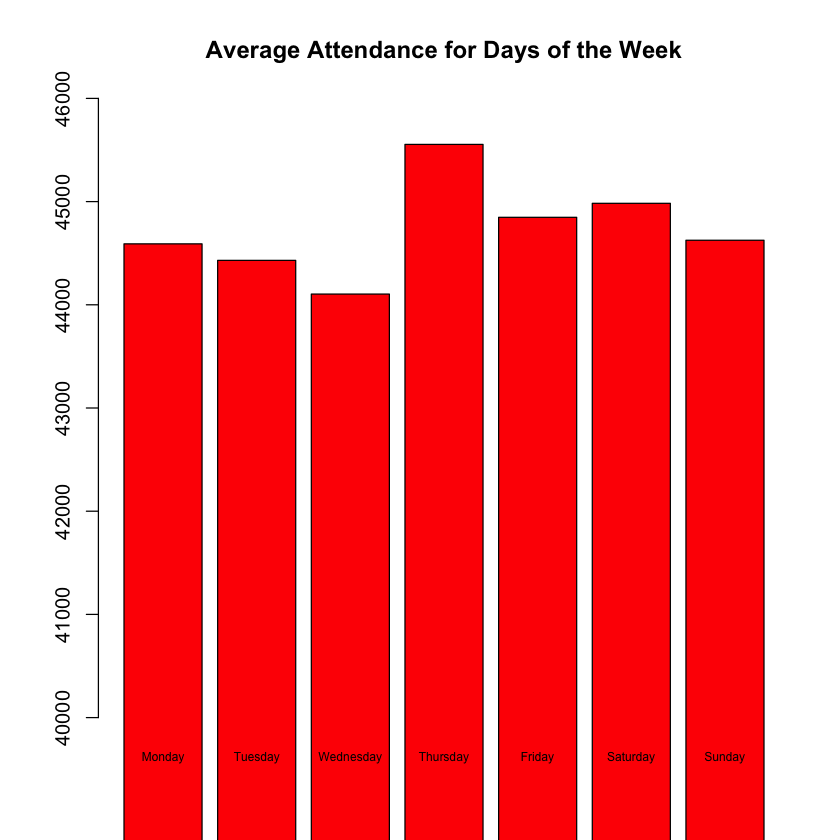

In [10]:
Mon_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Mon"]) 
Tue_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Tues"]) 
Wed_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Weds"]) 
Thu_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Thurs"]) 
Fri_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Fri"]) 
Sat_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Sat"]) 
Sun_avg_attend <- mean(pro2.df$Attend[pro2.df$Day == "Sun"]) 

weekend_att <- c(Mon_avg_attend, Tue_avg_attend, Wed_avg_attend, Thu_avg_attend, Fri_avg_attend,
                 Sat_avg_attend, Sun_avg_attend)

barplot <- barplot(weekend_att, names.arg = c("Monday", "Tuesday", "Wednesday", "Thursday",
                   "Friday","Saturday", "Sunday"), col = "red", ylim = c(40000, 46000),
                    cex.names=0.6, main = "Average Attendance for Days of the Week")

"As shown on the graph, Thursday has the highest average attendance:"

### Thursday has the highest average attendance, although there is not a wide dispersement of average between the days.

### Ask a question that can be answered with a directed graph:  The first time that a team from the National League West division played another team from the same division, how many runs were scored??

,Los Angeles,San Francisco,Colorado,Arizona,San Diego
Los Angeles,0,4,4,2,0
San Francisco,8,0,5,9,1
Colorado,5,6,0,12,8
Arizona,4,8,2,0,2
San Diego,3,3,6,1,0


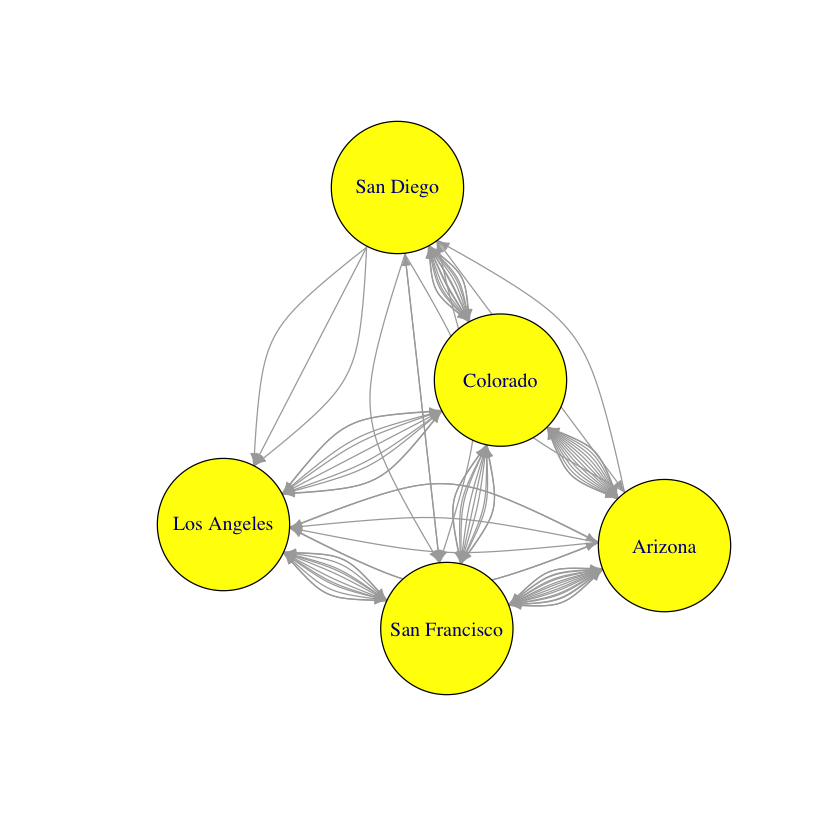

In [12]:
library(igraph) # load package igraph
adjm_nlw <- c()

adjm_nlw<-matrix(
c(0, 4, 4, 2, 0, 
  8, 0, 5, 9, 1,
  5, 6, 0, 12, 8, 
  4, 8, 2, 0, 2, 
  3, 3, 6, 1, 0), # data elements))
    nrow=5, # number of rows
ncol=5, # number of columns
byrow = TRUE) # fill matrix by rows

nlw_teams <- c("Los Angeles","San Francisco","Colorado","Arizona","San Diego")

rownames(adjm_nlw) <- nlw_teams
colnames(adjm_nlw) <- nlw_teams

adjm_nlw

dir_gr <- graph.adjacency(adjm_nlw, mode="directed")
plot(dir_gr, edge.arrow.size=.5, vertex.color="yellow", vertex.size=60)

### Create a function that makes a calculation and returns a value:  Of the teams that play in California, which team has the highest average attendance?

In [62]:
#pro2.df <- pro2.df[-c(1)]  # removes first column

The highest average attendence in California is: 48140

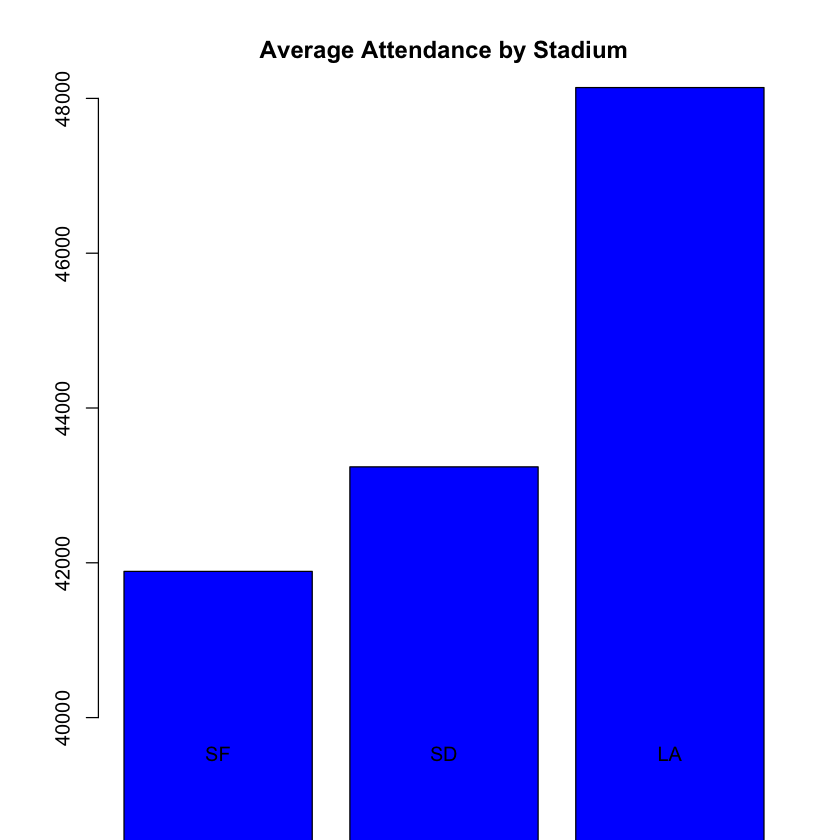

In [65]:
attend <- function(x) {
  SF_att <- 0
  SD_att <- 0
  LA_att <- 0
  SF_count <- 0
  SD_count <- 0
  LA_count <- 0
  for (i in 1:nrow(x)) {
    row <- x[i,]
    if (row$Home == "Giants") {
      SF_att <- SF_att + x[i,13]
      SF_count <- SF_count + 1
    }
    if (row$Home == "Padres") {
      SD_att <- SD_att + x[i,13]
      SD_count <- SD_count + 1
    }
    if (row$Home == "Dodgers") {
      LA_att <- LA_att + x[i,13]
      LA_count <- LA_count + 1
    }
  }
  
  SF_avg <- SF_att / SF_count
  SD_avg <- SD_att / SD_count
  LA_avg <- LA_att / LA_count
  
  plot_data <- c(SF_avg, SD_avg, LA_avg)
  
  bargraph <- barplot(plot_data, names.arg = c("SF", "SD", "LA"), col = "blue", ylim = c(40000, 48000), 
          main = "Average Attendance by Stadium")
  
  max_cal <- max(c(SF_avg,SD_avg,LA_avg))
  cat("The highest average attendence in California is:", max_cal)     
}

attend(pro2.df)

### This plot shows that LA averages the highest attendance amongst California teams.  This is not a large surprise because their stadium has the largest capacity. 

### Analyze correlation between variables by a plot:

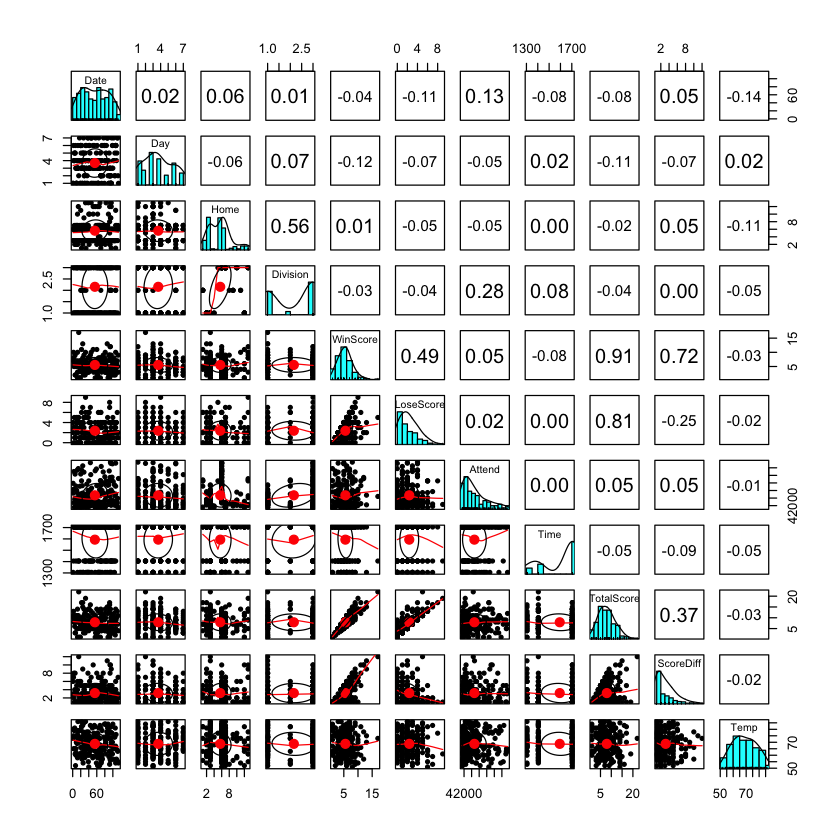

In [23]:
library('psych') # call psych library
mat_data4 <- pro2.df[c(2,3,4,5,8,9,13,14,16,17,18)]  # keep cols 
pairs.panels(mat_data4) # plot panels

### I plotted the pairs panels plot for 11 of the variables in the data set.  A few things that I noticed that were relevant:  the correlation between Temp and  Attend is -0.01, which shows these two variables by themselves are uncorrelated.  Time and Attend are also uncorrelated, however Division and attend has a higher correlation with Attend, indicating that teams in a certain division may have higher/lower attendance. WinScore and LoseScore have a rather high correlation of 0.49, which makes sense because the WinScore will always be greater than the LoseScore, so those variables are related.  Surprisingly, Temp and Division were uncorrelated - I suspected that the Division with warmer climates (West) would have warmer temperatures, but that was not true for this data set.  

# Section III: Linear Regression Model

### I chose to model the response variable of Attendence.  Attendence has a very low correlation with  time and temperature, but it does have a correlation of 0.28 with Division.  Since Home Stadium is a subset of Division, I decided to use Home as one of my explanatory variables, and used it's relationship with temperature for the model.  Also, I added the variable Time to the model.  Attendance also seemed to be a good variable to model, as common sense suggests that it could be influenced by the time, temperature and what city the game is taking place. Additionally, the score of the game is not determined until after the game is underway, so it wouldn't make sense to use score as an explanatory variable for Attendance.  

### After using the lm() function multiple times to experiement with different variables, I decided to model the response variable of Attendance using the explanatory variables of Temperature Home, and Time.  Rather than using the + sign to just include Temperature and Home, I found that including the interaction between them produced the best model.  The adjusted R^2 is 0.5555 and the F Statistic is 18.77, I will attempt to make some adjustments to find a better fit. 

In [37]:
att_mod4 <- lm( Attend ~  (Temp : Home) + Time, data = pro2.df)
summary(att_mod4)


Call:
lm(formula = Attend ~ (Temp:Home) + Time, data = pro2.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5367.8 -1018.9   -66.9  1007.0  5604.1 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        45691.3899  2009.0131  22.743  < 2e-16 ***
Time                  -0.2020     0.9713  -0.208  0.83548    
Temp:HomeBraves       21.9088    20.7787   1.054  0.29308    
Temp:HomeBrewers     -30.5144    19.7936  -1.542  0.12487    
Temp:HomeCardinals   -19.4273    17.0204  -1.141  0.25517    
Temp:HomeCubs        -52.0984    27.0172  -1.928  0.05534 .  
Temp:HomeDbacks       41.4806    31.0939   1.334  0.18383    
Temp:HomeDodgers      39.0659    17.3761   2.248  0.02574 *  
Temp:HomeGiants      -49.4588    17.5185  -2.823  0.00527 ** 
Temp:HomeMets        -56.3356    45.6795  -1.233  0.21904    
Temp:HomeNationals   -44.8515    24.3511  -1.842  0.06710 .  
Temp:HomePadres      -30.5255    21.0565  -1.450  0.14884    
Temp:HomePhillies   

### Plot the outliers:

 [1] "2"   "5"   "7"   "8"   "45"  "53"  "105" "150" "164" "185"


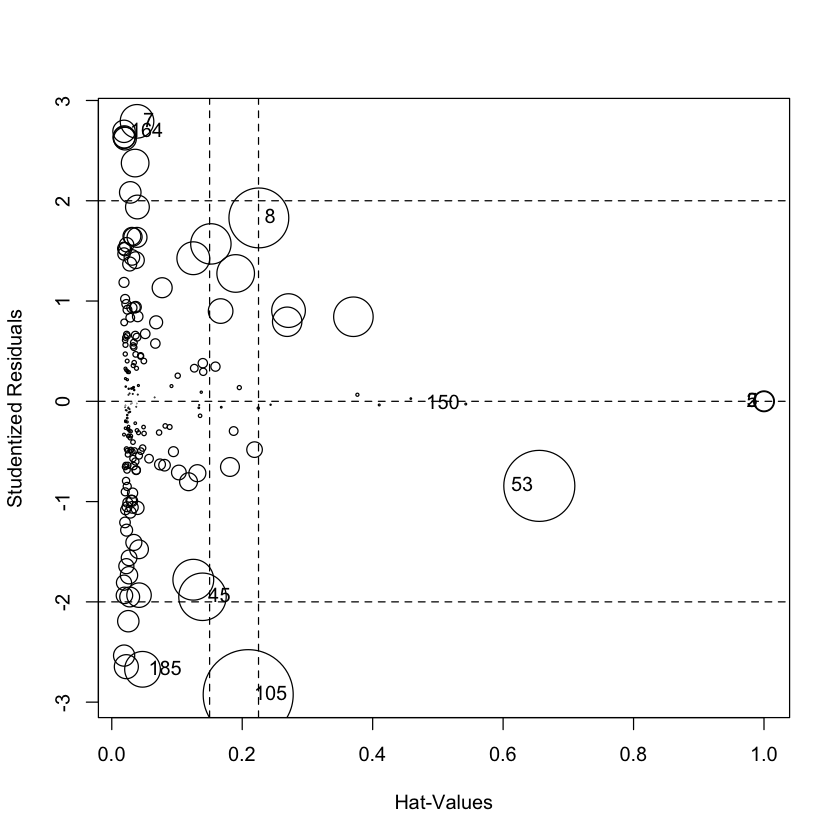

In [38]:
#library(car)
outliers <- influencePlot(att_mod4, id.n = 4)
outlier_names <- rownames(outliers)
print(outlier_names)

### The graph below shows that the error distribution is slightly skewed. 

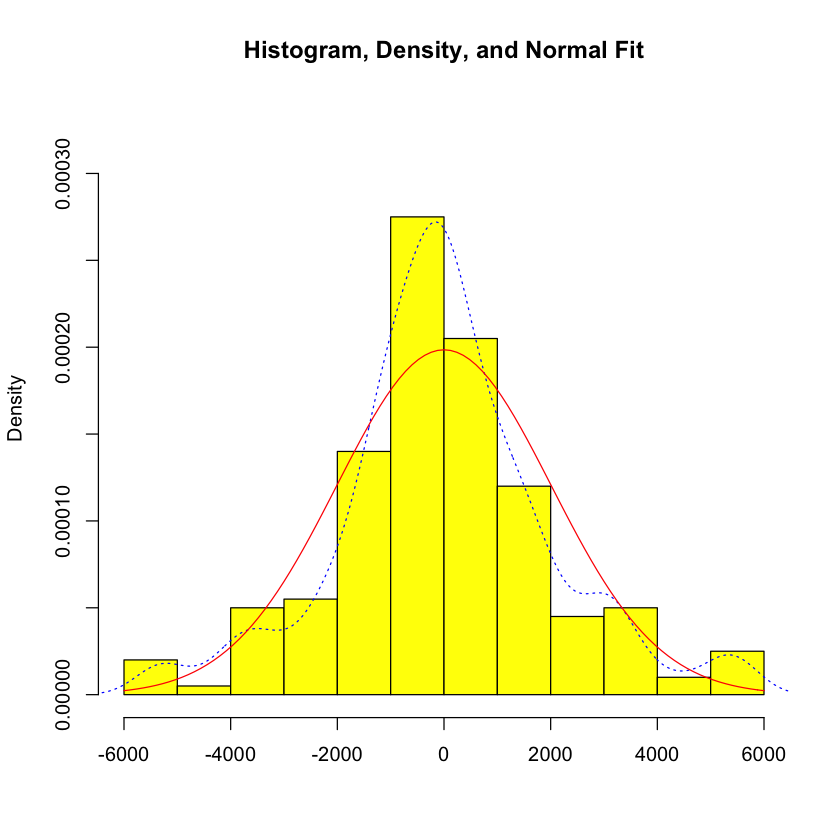

In [39]:
# plot histogram of residuals
multi.hist(residuals(att_mod4), bcol = "yellow", dcol = c("blue", "red"), dlty = c("dotted", "solid"))


### Remove outliers:

In [40]:
# remove outliers, store in mat_data5
mat_data5 <- mat_data4[-which(rownames(mat_data4) %in% outlier_names),]  # remove the outliers

### A new model is fit using the data after the outliers have been removed.  It shows an improved Adjusted R^2 score of 0.5973, as well as an improvement of the F Statistic to 24.36.  Also, looking at the residuals, the data is symmetric. 

In [41]:
att_mod5 <- lm( Attend ~  (Temp : Home) + Time , data = mat_data5)
summary(att_mod5)


Call:
lm(formula = Attend ~ (Temp:Home) + Time, data = mat_data5)

Residuals:
    Min      1Q  Median      3Q     Max 
-5374.1  -978.6  -123.6   855.2  5440.2 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        44259.4773  1942.0574  22.790  < 2e-16 ***
Time                   0.2622     0.9219   0.284  0.77644    
Temp:HomeBraves       50.5893    20.3979   2.480  0.01407 *  
Temp:HomeBrewers     -20.3701    18.5783  -1.096  0.27437    
Temp:HomeCardinals    -9.5444    16.0765  -0.594  0.55348    
Temp:HomeCubs        -39.3327    33.0200  -1.191  0.23518    
Temp:HomeDodgers      47.9257    16.4494   2.914  0.00403 ** 
Temp:HomeGiants      -39.8374    16.4958  -2.415  0.01675 *  
Temp:HomeNationals   -35.0839    22.6610  -1.548  0.12336    
Temp:HomePadres      -20.1295    19.7360  -1.020  0.30915    
Temp:HomePhillies      8.0214    41.3172   0.194  0.84629    
Temp:HomeReds        -35.6425    19.5121  -1.827  0.06943 .  
Temp:HomeRockies  

### Removing the outliers slightly improved the normality of the error distribution, as shown on the graph below.  The tails are smoother than the prior histogram.  This shows that the error is distributed normally. 

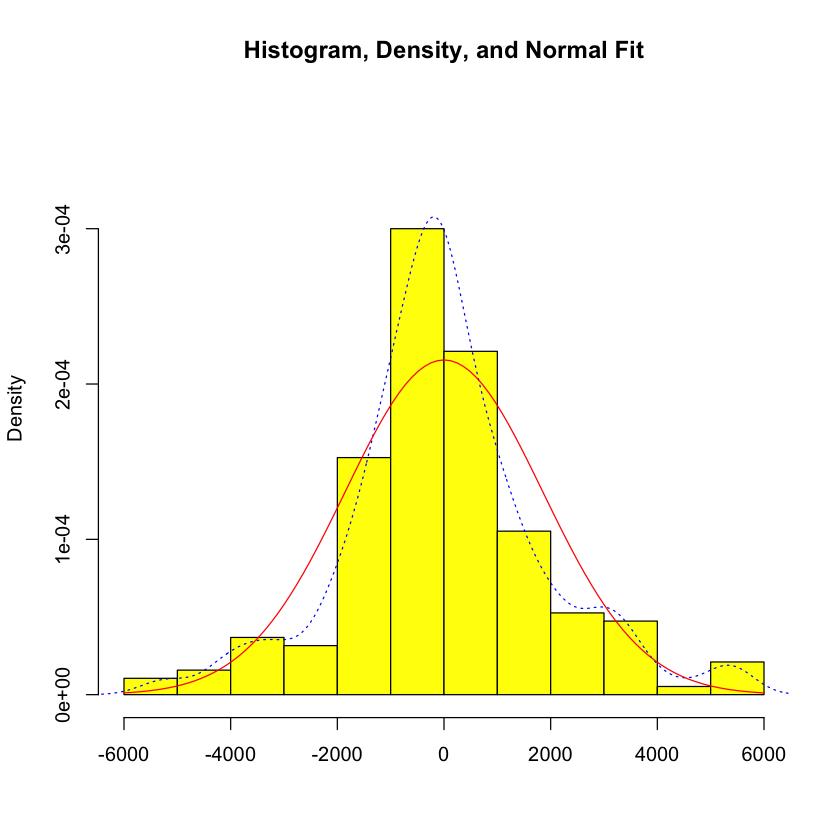

In [42]:
# plot histogram of residuals
multi.hist(residuals(att_mod5), bcol = "yellow", dcol = c("blue", "red"), dlty = c("dotted", "solid"))


### Ultimately, I chose to go with this model after a boxcox transformation did not improve any of the heteroscadascity issues. Despite the issues with heteroscadacity, the data is symmetric, it has linearity between variables and the error is normally distributed.  Additionally, removing the outliers  improved the Adjusted R^2 score of 0.5973, as well as an improvement of the F Statistic to 24.36.  

In [47]:
att_mod5 <- lm( Attend ~  (Temp : Home) + Time , data = mat_data5)
summary(att_mod5)


Call:
lm(formula = Attend ~ (Temp:Home) + Time, data = mat_data5)

Residuals:
    Min      1Q  Median      3Q     Max 
-5374.1  -978.6  -123.6   855.2  5440.2 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        44259.4773  1942.0574  22.790  < 2e-16 ***
Time                   0.2622     0.9219   0.284  0.77644    
Temp:HomeBraves       50.5893    20.3979   2.480  0.01407 *  
Temp:HomeBrewers     -20.3701    18.5783  -1.096  0.27437    
Temp:HomeCardinals    -9.5444    16.0765  -0.594  0.55348    
Temp:HomeCubs        -39.3327    33.0200  -1.191  0.23518    
Temp:HomeDodgers      47.9257    16.4494   2.914  0.00403 ** 
Temp:HomeGiants      -39.8374    16.4958  -2.415  0.01675 *  
Temp:HomeNationals   -35.0839    22.6610  -1.548  0.12336    
Temp:HomePadres      -20.1295    19.7360  -1.020  0.30915    
Temp:HomePhillies      8.0214    41.3172   0.194  0.84629    
Temp:HomeReds        -35.6425    19.5121  -1.827  0.06943 .  
Temp:HomeRockies  

### Model explanation in English:  This model shows that for every degree in temperature at a certain stadium, and for every possible starting time, the expected attendence changes based on the 'estimate'.  There is an intercept at 44259.4773, so for a 60 degree game in San Franscisco that starts at 1:05PM, the expected attendence is 44259.4773 + 60*(-39.8374) + 1305*(0.2622) = 41932

### Predict 5 Points:

In [48]:
# values taken from regression summary output above
intercept <- 44259.4773
time_coeff <- 0.2622
Braves <- 50.5893
Brewers <- -20.3701
Cardinals <- -9.5444
Cubs <- -39.3327
Dodgers <- 47.9257
Giants <- -39.8374
Nationals <- -35.0839
Padres <- -20.1295
Phillies <- 8.0214
Reds <- -35.6425
Rockies <- 17.0574

temp1 <- 60
temp2 <- 40
temp3 <- 71
temp4 <- 48
temp5 <- 75

time1 <- 1305
time2 <- 1905
time3 <- 1905
time4 <- 1605
time5 <- 1305


pre1 <- round(intercept + temp1*Cardinals + time1*time_coeff,0)
pre2 <- round(intercept + temp2*Brewers + time2*time_coeff,0)
pre3 <- round(intercept + temp3*Braves + time3*time_coeff,0)
pre4 <- round(intercept + temp4*Nationals + time4*time_coeff,0)
pre5 <- round(intercept + temp5*Reds + time5*time_coeff,0)


cat("For a 60 degree game in St. Louis at 1:05, the expected attendence is:", pre1,"\n")
cat("For a 40 degree game in Milwaukee at 7:05, the expected attendence is:", pre2,"\n")
cat("For a 71 degree game in Atlanta at 7:05, the expected attendence is:", pre3,"\n")
cat("For a 48 degree game in Washington at 4:05, the expected attendence is:", pre4,"\n")
cat("For a 75 degree game in Cincinnati at 1:05, the expected attendence is:", pre5,"\n")

For a 60 degree game in St. Louis at 1:05, the expected attendence is: 44029 
For a 40 degree game in Milwaukee at 7:05, the expected attendence is: 43944 
For a 71 degree game in Atlanta at 7:05, the expected attendence is: 48351 
For a 48 degree game in Washington at 4:05, the expected attendence is: 42996 
For a 75 degree game in Cincinnati at 1:05, the expected attendence is: 41928 


### Plot regression line (shown on the Residuals vs Fitted graph in upper left corner):

Warning message:
“not plotting observations with leverage one:
  8, 144”Warning message:
“not plotting observations with leverage one:
  8, 144”

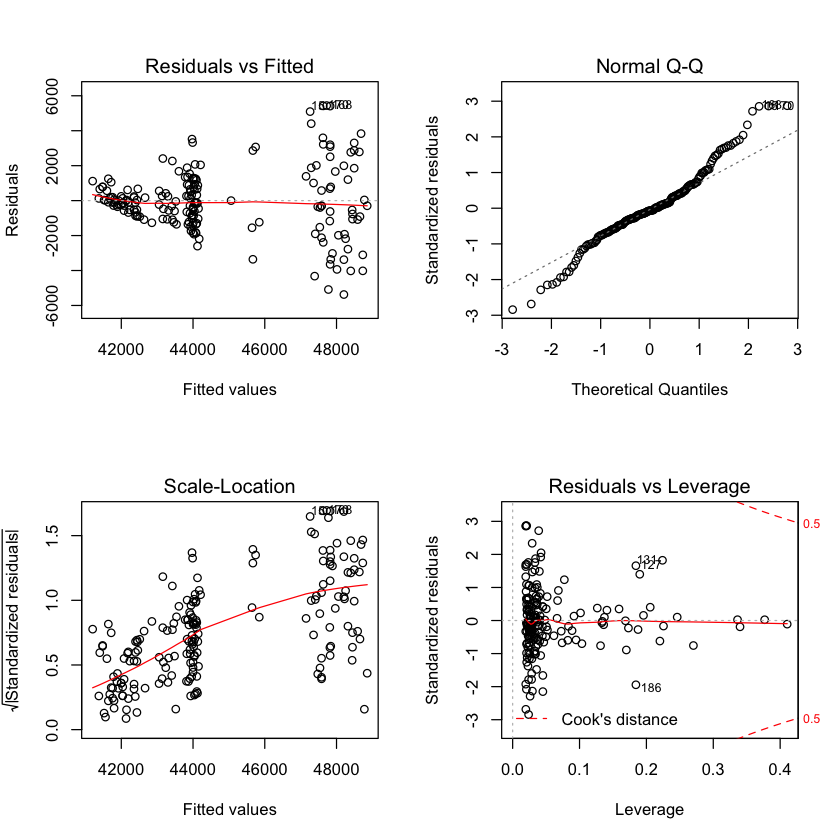

In [50]:
par(mfrow = c(2,2))
plot(att_mod5)